<a href="https://colab.research.google.com/github/Oriyans-sunset/Forest-Area-Prediction/blob/main/Forest_Fire_Area_Prediction_By_Country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Getting and exploring the data

In [ ]:
forest_dataset = pd.read_csv('./forest_fire_dataset.csv')
forest_dataset.head()

,CountryID,Country and Area,"Forest Area, 1990","Forest Area, 2000","Forest Area, 2010","Forest Area, 2015","Forest Area, 2020","Total Land Area, 2020","Forest Area as a Proportion of \nTotal Land Area, 2020","Deforestation, \n2015-2020","Total Forest Area \nAffected by Fire, 2015"
0,NaN,Unit,1000 ha,1000 ha,1000 ha,1000 ha,1000 ha,1000 ha,%,1000 ha/year,1000 ha
1,NaN,WORLD,4236433.42,4158049.52,4106316.94,…,4058930.81,13003000,31.13,10200,98040
2,4.0,Afghanistan,1208.44,1208.44,1208.44,1208.44,1208.44,65286,1.85,...,...
3,8.0,Albania,788.8,769.3,782.07,789.19,788.9,2740,28.79,...,...
4,12.0,Algeria,1667,1579,1918,1956,1949,238174,0.82,5.4,...


In [ ]:
# No use of ID in this project
forest_dataset.drop(columns=['CountryID'], inplace=True)

# Making coulmn names simpler to read
forest_dataset = forest_dataset.rename(columns={forest_dataset.columns[7]: 'Forest Area as a Proportion of Total Land Area, 2020'})
forest_dataset = forest_dataset.rename(columns={forest_dataset.columns[8]: 'Deforestation, 2015 to 2020'})
forest_dataset = forest_dataset.rename(columns={forest_dataset.columns[9]: 'Total Forest Area Affected by Fire, 2015'})


In [ ]:
forest_dataset = forest_dataset.drop(0)
forest_dataset.head()

,Country and Area,"Forest Area, 1990","Forest Area, 2000","Forest Area, 2010","Forest Area, 2015","Forest Area, 2020","Total Land Area, 2020","Forest Area as a Proportion of Total Land Area, 2020","Deforestation, 2015 to 2020","Total Forest Area Affected by Fire, 2015"
1,WORLD,4236433.42,4158049.52,4106316.94,…,4058930.81,13003000,31.13,10200,98040
2,Afghanistan,1208.44,1208.44,1208.44,1208.44,1208.44,65286,1.85,...,...
3,Albania,788.8,769.3,782.07,789.19,788.9,2740,28.79,...,...
4,Algeria,1667,1579,1918,1956,1949,238174,0.82,5.4,...
5,American Samoa,18.07,17.73,17.43,17.28,17.13,20,85.65,...,0


In [ ]:
entire_world_stats_row = forest_dataset.iloc[0]
forest_dataset = forest_dataset.drop(1)
forest_dataset.head()

,Country and Area,"Forest Area, 1990","Forest Area, 2000","Forest Area, 2010","Forest Area, 2015","Forest Area, 2020","Total Land Area, 2020","Forest Area as a Proportion of Total Land Area, 2020","Deforestation, 2015 to 2020","Total Forest Area Affected by Fire, 2015"
2,Afghanistan,1208.44,1208.44,1208.44,1208.44,1208.44,65286,1.85,...,...
3,Albania,788.8,769.3,782.07,789.19,788.9,2740,28.79,...,...
4,Algeria,1667,1579,1918,1956,1949,238174,0.82,5.4,...
5,American Samoa,18.07,17.73,17.43,17.28,17.13,20,85.65,...,0
6,Andorra,16,16,16,16,16,47,34.04,...,...


In [ ]:
forest_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 2 to 237
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Country and Area                                      236 non-null    object
 1   Forest Area, 1990                                     236 non-null    object
 2   Forest Area, 2000                                     236 non-null    object
 3   Forest Area, 2010                                     236 non-null    object
 4   Forest Area, 2015                                     236 non-null    object
 5   Forest Area, 2020                                     236 non-null    object
 6   Total Land Area, 2020                                 236 non-null    object
 7   Forest Area as a Proportion of Total Land Area, 2020  236 non-null    object
 8   Deforestation, 2015 to 2020                           236 non-null    

# Missing value imputation

In [ ]:
# first we need to replace all the missing value symbols with Nan for convinience
for column in forest_dataset.columns:
  forest_dataset[column] = forest_dataset[column].replace('...', np.nan)

## Exploratory Data Analysis(EDA)

In [ ]:
# figureing out the number of Nan rows
forest_dataset.isna().sum()
percentage_of_nan_values = (forest_dataset.isna().sum()/forest_dataset.shape[0])
percentage_of_nan_values

,0
Country and Area,0.000000
"Forest Area, 1990",0.000000
"Forest Area, 2000",0.000000
"Forest Area, 2010",0.000000
"Forest Area, 2015",0.000000
"Forest Area, 2020",0.000000
"Total Land Area, 2020",0.000000
"Forest Area as a Proportion of Total Land Area, 2020",0.000000
"Deforestation, 2015 to 2020",0.478814
"Total Forest Area Affected by Fire, 2015",0.500000


We need to explore the data a bit before, to understand the relationship between variables and to know which models would suit our needs

In [ ]:
forest_dataset.head()

,Country and Area,"Forest Area, 1990","Forest Area, 2000","Forest Area, 2010","Forest Area, 2015","Forest Area, 2020","Total Land Area, 2020","Forest Area as a Proportion of Total Land Area, 2020","Deforestation, 2015 to 2020","Total Forest Area Affected by Fire, 2015"
2,Afghanistan,1208.44,1208.44,1208.44,1208.44,1208.44,65286,1.85,NaN,NaN
3,Albania,788.8,769.3,782.07,789.19,788.9,2740,28.79,NaN,NaN
4,Algeria,1667,1579,1918,1956,1949,238174,0.82,5.4,NaN
5,American Samoa,18.07,17.73,17.43,17.28,17.13,20,85.65,NaN,0
6,Andorra,16,16,16,16,16,47,34.04,NaN,NaN


<ipython-input-456-4b3584e2d4c9>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  country_name = str(forest_dataset.iloc[int(num)][0])


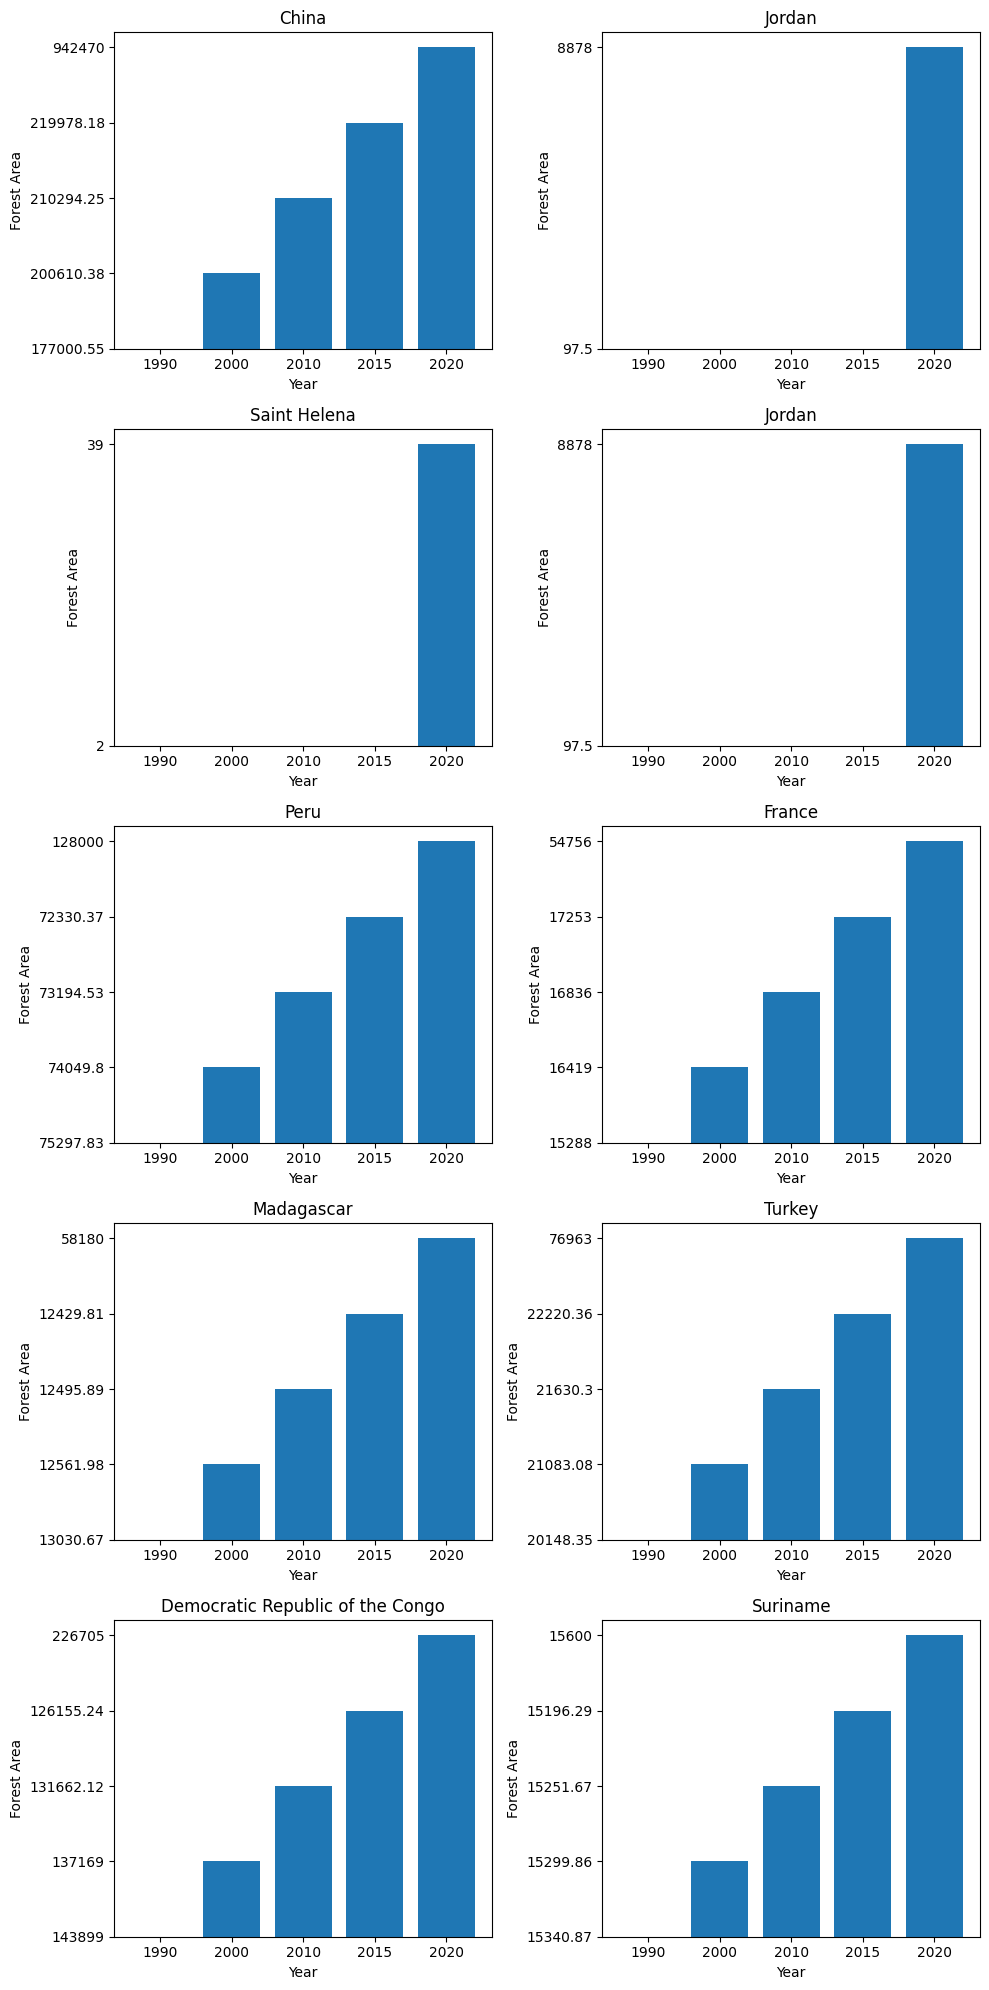

In [ ]:
import random

# plotting changes in forest area year-over-year by country
year_columns = ['1990', '2000',  '2010', '2015', '2020']

random.seed(21)
random_10_countrires = []

for _ in range(10):
  random_10_countrires.append(random.randint(0, len(forest_dataset)))

fig, axes = plt.subplots(5, 2, figsize=(10, 20))  # 5 rows, 2 columns

for index, num in enumerate(random_10_countrires):
  country_name = str(forest_dataset.iloc[int(num)][0])
  country_forest_fire_vals = [str(val) for val in forest_dataset.iloc[int(num)]][2:7]

  row, col = divmod(index, 2)

  axes[row, col].bar(year_columns, country_forest_fire_vals, fill=True)
  axes[row, col].set_xlabel('Year')
  axes[row, col].set_ylabel('Forest Area')
  axes[row, col].set_title(f'{country_name}')

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.tight_layout()
plt.show()


In most countries we can see there is a steady increase of area covered by forest fires

In [ ]:
# A feature that can help us understand the data better would be,
# percentage change in area over the 20 years since 1990 and 2020
forest_dataset['percentage_change_from_1990_to_2020'] = (forest_dataset['Forest Area, 2020'].astype(float) - forest_dataset['Forest Area, 1990'].astype(float)) / forest_dataset['Forest Area, 1990'].astype(float) * 100
forest_dataset.head()

,Country and Area,"Forest Area, 1990","Forest Area, 2000","Forest Area, 2010","Forest Area, 2015","Forest Area, 2020","Total Land Area, 2020","Forest Area as a Proportion of Total Land Area, 2020","Deforestation, 2015 to 2020","Total Forest Area Affected by Fire, 2015",percentage_change_from_1990_to_2020
2,Afghanistan,1208.44,1208.44,1208.44,1208.44,1208.44,65286,1.85,NaN,NaN,0.000000
3,Albania,788.8,769.3,782.07,789.19,788.9,2740,28.79,NaN,NaN,0.012677
4,Algeria,1667,1579,1918,1956,1949,238174,0.82,5.4,NaN,16.916617
5,American Samoa,18.07,17.73,17.43,17.28,17.13,20,85.65,NaN,0,-5.201992
6,Andorra,16,16,16,16,16,47,34.04,NaN,NaN,0.000000


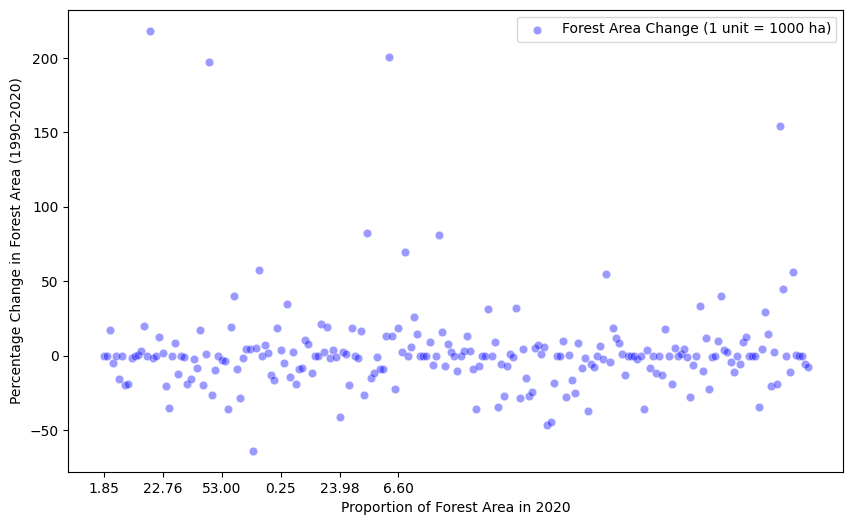

In [ ]:
# scatter plot of all the countires and thier percentage change since 1990
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Forest Area as a Proportion of Total Land Area, 2020', y='percentage_change_from_1990_to_2020',
                data=forest_dataset,
                alpha=0.4,
                color='blue',
                label='Forest Area Change (1 unit = 1000 ha)')

plt.xlabel('Proportion of Forest Area in 2020')
plt.ylabel('Percentage Change in Forest Area (1990-2020)')

forest_dataset['Forest Area as a Proportion of Total Land Area, 2020'] = pd.to_numeric(forest_dataset['Forest Area as a Proportion of Total Land Area, 2020'], errors='coerce')
summary = forest_dataset['Forest Area as a Proportion of Total Land Area, 2020'].describe()

min_val = int(summary['min'])
max_val = int(summary['max'])
column_range = max_val - min_val

x_ticks = []

for i in range(min_val, max_val, int(column_range/5) ):
  x_ticks.append(i)

plt.xticks(x_ticks)
plt.show()

## Decresing skewness of the dataset

In [ ]:
# remove country name column, since we dont need it
forest_dataset = forest_dataset.drop(columns=['Country and Area'], axis=1)

# convert nan values to 0
forest_dataset['percentage_change_from_1990_to_2020'] = forest_dataset['percentage_change_from_1990_to_2020'].fillna(0)

# convert elements of all the column to numeric
for column in forest_dataset.columns:
  forest_dataset[column] = pd.to_numeric(forest_dataset[column], errors='coerce')

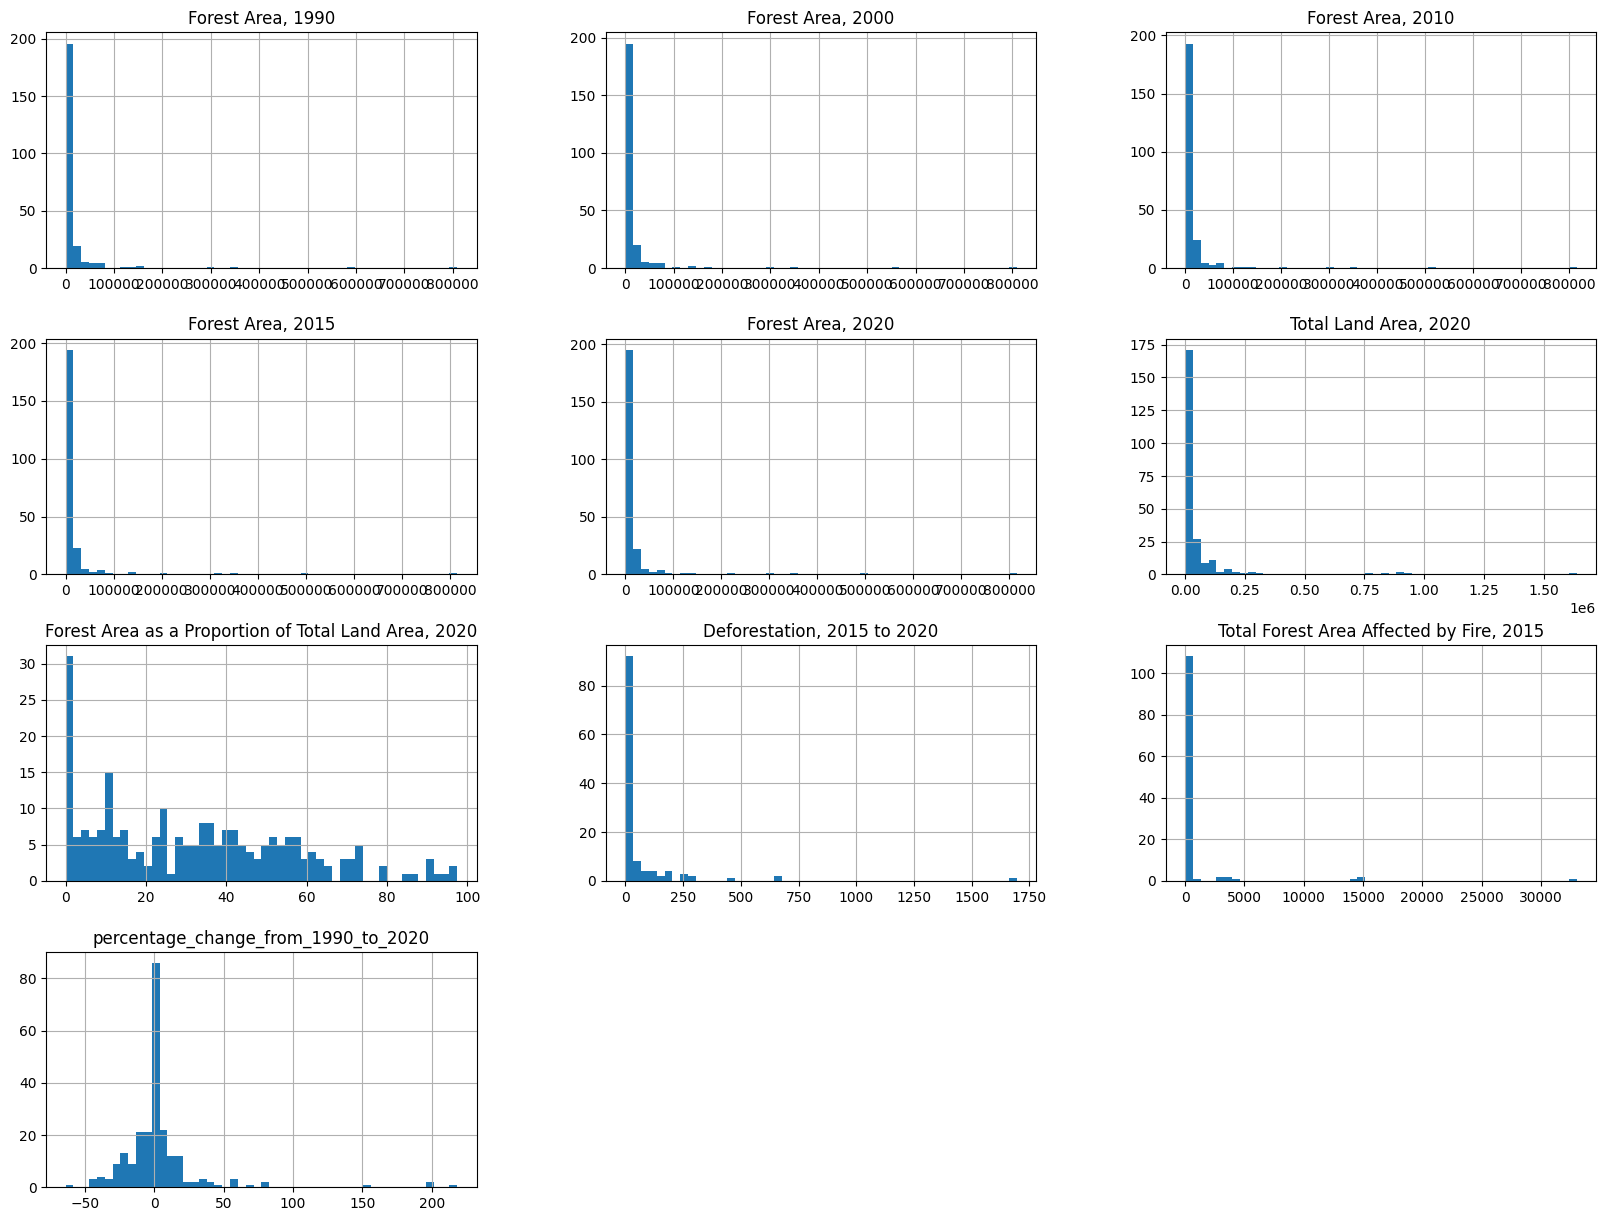

In [ ]:
forest_dataset.hist(bins=50, figsize=(20, 15))
plt.show()

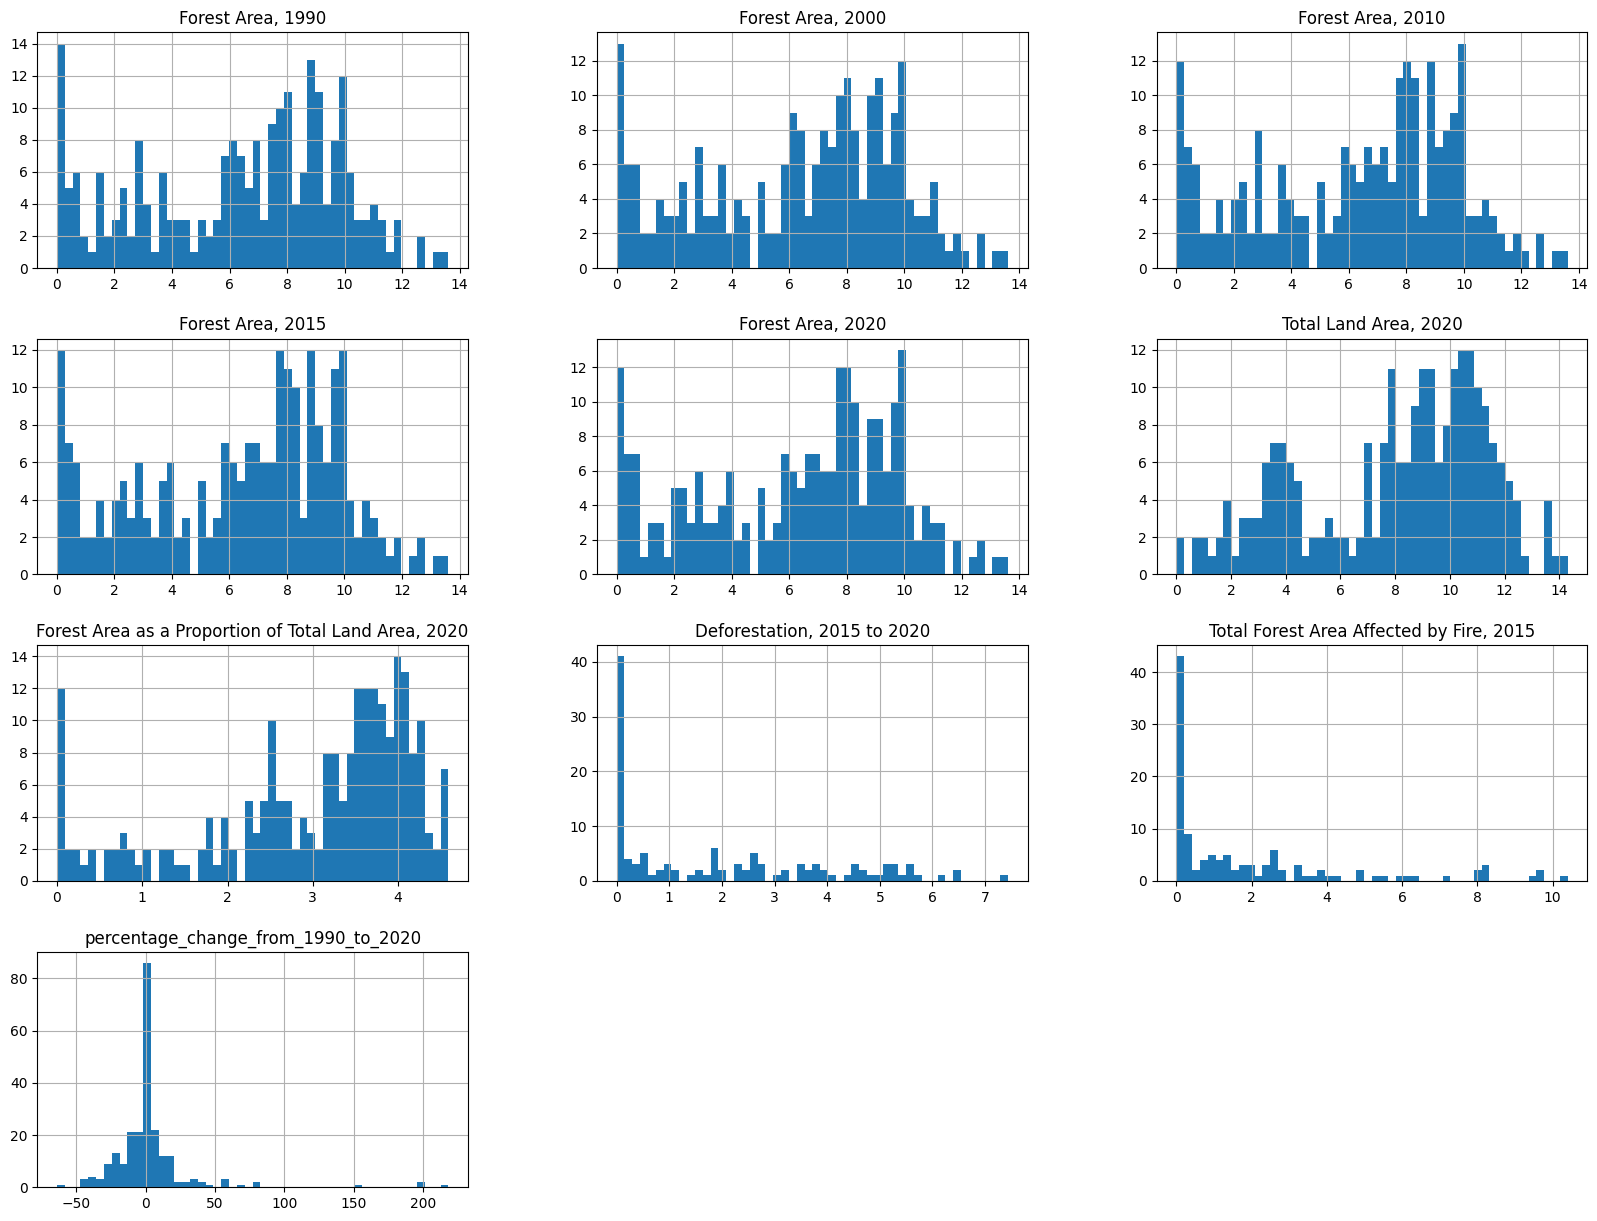

In [ ]:
# Log transformation to imporve the skewness of the data
def log_transform(df):
    df_log_transformed = df.copy()
    for column in df_log_transformed.select_dtypes(include=[np.number]).columns:
      if column == 'percentage_change_from_1990_to_2020':
        continue
      else:
        df_log_transformed[column] = np.log1p(df_log_transformed[column])
    return df_log_transformed

forest_dataset = log_transform(forest_dataset)

forest_dataset.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
forest_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 2 to 237
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Forest Area, 1990                                     236 non-null    float64
 1   Forest Area, 2000                                     236 non-null    float64
 2   Forest Area, 2010                                     236 non-null    float64
 3   Forest Area, 2015                                     236 non-null    float64
 4   Forest Area, 2020                                     236 non-null    float64
 5   Total Land Area, 2020                                 236 non-null    float64
 6   Forest Area as a Proportion of Total Land Area, 2020  236 non-null    float64
 7   Deforestation, 2015 to 2020                           123 non-null    float64
 8   Total Forest Area Affected by Fire, 2015              118 no

In [ ]:
forest_dataset_deforestation = forest_dataset.dropna(subset=['Deforestation, 2015 to 2020'], inplace=False).drop(['Total Forest Area Affected by Fire, 2015'], axis=1)

In [ ]:
forest_dataset_deforestation.shape

(123, 9)

## Deforestation Prediction

### Splitting data into test and train

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor as KnearestNeighborsRegressor

X = forest_dataset_deforestation.drop(columns=['Deforestation, 2015 to 2020'])
y = forest_dataset_deforestation['Deforestation, 2015 to 2020']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((98, 8), (25, 8), (98,), (25,))

### Running the model

In [ ]:
from sklearn.model_selection import KFold

# Perfrom cross-validation on different models
model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

print(f'Avg of Mean Absolute Error Scores(LR): {mae_scores.mean()}')

model = Ridge(alpha=1.0)

mae_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

print(f'Avg of Mean Absolute Error Scores(Ridge): {mae_scores.mean()}')

model = Lasso(alpha=1.0)

mae_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

print(f'Avg of Mean Absolute Error Scores(Lasso): {mae_scores.mean()}')

model = ElasticNet(alpha=1.0, l1_ratio=0.5)

mae_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

print(f'Avg of Mean Absolute Error Scores(ElasticNet): {mae_scores.mean()}')

model = DecisionTreeRegressor(random_state=42)

mae_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

print(f'Avg of Mean Absolute Error Scores(DT): {mae_scores.mean()}')

model = RandomForestRegressor(n_estimators=20, random_state=42)

mae_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

print(f'Avg of Mean Absolute Error Scores(RF): {mae_scores.mean()}')

model = GradientBoostingRegressor(n_estimators=100, random_state=42)

mae_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

print(f'Avg of Mean Absolute Error Scores(GB): {mae_scores.mean()}')

model = KnearestNeighborsRegressor(n_neighbors=5)

mae_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

print(f'Avg of Mean Absolute Error Scores(KNN): {mae_scores.mean()}')

Avg of Mean Absolute Error Scores(LR): -1.143904888262345
Avg of Mean Absolute Error Scores(Ridge): -1.1361084857331227
Avg of Mean Absolute Error Scores(Lasso): -1.2713220307112425
Avg of Mean Absolute Error Scores(ElasticNet): -1.2523209265181061
Avg of Mean Absolute Error Scores(DT): -0.9515704539754815
Avg of Mean Absolute Error Scores(RF): -0.6983416287979518
Avg of Mean Absolute Error Scores(GB): -0.7098225001846888
Avg of Mean Absolute Error Scores(KNN): -0.7976924921701215


After having tried different models, ensemble  models seemed to perform much better than any other, likely because the scaricty of data doesn't allow simpler models(especially, linear models) to capture the complexity(underfitting), and therefore we choose Random Forest for our predictions on test.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#train the model using training data
random_forest_model = RandomForestRegressor(n_estimators=20, random_state=41)
random_forest_model.fit(X_train, y_train)

#make predictions on the test data
y_pred = random_forest_model.predict(X_test)

#calculate the mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Mean Squared Error: {rmse}')

#calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

#calculate the r2 score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

Mean Squared Error: 1.0147390211360774
Mean Absolute Error: 0.7021599412329571
R2 Score: 0.655232242050449


### Fill in the missing values for Deforestation column using the model

In [ ]:
X = forest_dataset_deforestation.drop(columns=['Deforestation, 2015 to 2020'], axis=1)
y = forest_dataset_deforestation['Deforestation, 2015 to 2020']

# training the model
model_deforestation = RandomForestRegressor(n_estimators=20, random_state=42)
model_deforestation.fit(X, y)

# get the nan rows from dataset
nan_rows = forest_dataset.drop('Total Forest Area Affected by Fire, 2015', axis=1)[forest_dataset['Deforestation, 2015 to 2020'].isna()]
X_nan_rows = nan_rows.drop(columns=['Deforestation, 2015 to 2020'], axis=1)

# predicting the missing values
nan_rows['Deforestation, 2015 to 2020'] = model_deforestation.predict(X_nan_rows)

forest_dataset_copy = forest_dataset.copy()
forest_dataset_copy.update(nan_rows)

In [ ]:
forest_dataset_copy.info()
forest_dataset_total_forest_area_affected_by_fire = forest_dataset_copy.dropna(subset=['Total Forest Area Affected by Fire, 2015'], inplace=False)
forest_dataset_total_forest_area_affected_by_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 2 to 237
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Forest Area, 1990                                     236 non-null    float64
 1   Forest Area, 2000                                     236 non-null    float64
 2   Forest Area, 2010                                     236 non-null    float64
 3   Forest Area, 2015                                     236 non-null    float64
 4   Forest Area, 2020                                     236 non-null    float64
 5   Total Land Area, 2020                                 236 non-null    float64
 6   Forest Area as a Proportion of Total Land Area, 2020  236 non-null    float64
 7   Deforestation, 2015 to 2020                           236 non-null    float64
 8   Total Forest Area Affected by Fire, 2015              118 no

## Total Forest Area Affected By Fire, 2015

### Splitting into test and train

In [ ]:
forest_dataset_total_forest_area_affected_by_fire.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 5 to 237
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Forest Area, 1990                                     118 non-null    float64
 1   Forest Area, 2000                                     118 non-null    float64
 2   Forest Area, 2010                                     118 non-null    float64
 3   Forest Area, 2015                                     118 non-null    float64
 4   Forest Area, 2020                                     118 non-null    float64
 5   Total Land Area, 2020                                 118 non-null    float64
 6   Forest Area as a Proportion of Total Land Area, 2020  118 non-null    float64
 7   Deforestation, 2015 to 2020                           118 non-null    float64
 8   Total Forest Area Affected by Fire, 2015              118 non-nul

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor as KnearestNeighborsRegressor

X = forest_dataset_total_forest_area_affected_by_fire.drop(columns=['Total Forest Area Affected by Fire, 2015'], axis=1)
y = forest_dataset_total_forest_area_affected_by_fire['Total Forest Area Affected by Fire, 2015']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((94, 9), (24, 9), (94,), (24,))

### Running the model

In [ ]:
from sklearn.model_selection import KFold

# Perfrom cross-validation on different models
model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

print(f'Avg of Mean Absolute Error Scores(LR): {mae_scores.mean()}')

model = Ridge(alpha=1.0)

mae_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

print(f'Avg of Mean Absolute Error Scores(Ridge): {mae_scores.mean()}')

model = Lasso(alpha=1.0)

mae_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

print(f'Avg of Mean Absolute Error Scores(Lasso): {mae_scores.mean()}')

model = ElasticNet(alpha=1.0, l1_ratio=0.5)

mae_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

print(f'Avg of Mean Absolute Error Scores(ElasticNet): {mae_scores.mean()}')

model = DecisionTreeRegressor(random_state=42)

mae_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

print(f'Avg of Mean Absolute Error Scores(DT): {mae_scores.mean()}')

model = RandomForestRegressor(n_estimators=100, random_state=42)

mae_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

print(f'Avg of Mean Absolute Error Scores(RF): {mae_scores.mean()}')

model = GradientBoostingRegressor(n_estimators=100, random_state=42)

mae_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

print(f'Avg of Mean Absolute Error Scores(GB): {mae_scores.mean()}')

model = KnearestNeighborsRegressor(n_neighbors=5)

mae_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

print(f'Avg of Mean Absolute Error Scores(KNN): {mae_scores.mean()}')

Avg of Mean Absolute Error Scores(LR): -1.5787592728720519
Avg of Mean Absolute Error Scores(Ridge): -1.5075543416024915
Avg of Mean Absolute Error Scores(Lasso): -1.4891337042682027
Avg of Mean Absolute Error Scores(ElasticNet): -1.48982103982022
Avg of Mean Absolute Error Scores(DT): -1.6578773202839763
Avg of Mean Absolute Error Scores(RF): -1.2394683509155737
Avg of Mean Absolute Error Scores(GB): -1.2664905379039695
Avg of Mean Absolute Error Scores(KNN): -1.2895494957949776


In [ ]:
# using GridSearchCV to find the best paramenter values for RF
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best mean squared error: ", grid_search.best_score_)

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1350 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
467 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

Best parameters found:  {'bootstrap': True, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best mean squared error:  0.5641737712624924


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


#make predictions on the test data
y_pred = grid_search.predict(X_test)

#calculate the mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Mean Squared Error: {rmse}')

#calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

#calculate the r2 score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

Mean Squared Error: 1.5686036648861628
Mean Absolute Error: 1.055853522286462
R2 Score: 0.6400659603614444


### Filling the missing values for Total Forest Area Affected by Fire, 2015

In [ ]:
forest_dataset_total_forest_area_affected_by_fire.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 5 to 237
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Forest Area, 1990                                     118 non-null    float64
 1   Forest Area, 2000                                     118 non-null    float64
 2   Forest Area, 2010                                     118 non-null    float64
 3   Forest Area, 2015                                     118 non-null    float64
 4   Forest Area, 2020                                     118 non-null    float64
 5   Total Land Area, 2020                                 118 non-null    float64
 6   Forest Area as a Proportion of Total Land Area, 2020  118 non-null    float64
 7   Deforestation, 2015 to 2020                           118 non-null    float64
 8   Total Forest Area Affected by Fire, 2015              118 non-nul

In [ ]:
X = forest_dataset_total_forest_area_affected_by_fire.drop(columns=['Total Forest Area Affected by Fire, 2015'], axis=1)
y = forest_dataset_total_forest_area_affected_by_fire['Total Forest Area Affected by Fire, 2015']

# training the model
params = {}

model_total_forest_area = RandomForestRegressor(bootstrap=True, max_depth=6, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, n_estimators=200)
model_total_forest_area.fit(X, y)

# get the nan rows from dataset
nan_rows = forest_dataset_copy[forest_dataset_copy['Total Forest Area Affected by Fire, 2015'].isna()]
X_nan_rows = nan_rows.drop(columns=['Total Forest Area Affected by Fire, 2015'], axis=1)

# predicting the missing values
nan_rows['Total Forest Area Affected by Fire, 2015'] = model_total_forest_area.predict(X_nan_rows)

forest_dataset_final = forest_dataset_copy.copy()
forest_dataset_final.update(nan_rows)
forest_dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 2 to 237
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Forest Area, 1990                                     236 non-null    float64
 1   Forest Area, 2000                                     236 non-null    float64
 2   Forest Area, 2010                                     236 non-null    float64
 3   Forest Area, 2015                                     236 non-null    float64
 4   Forest Area, 2020                                     236 non-null    float64
 5   Total Land Area, 2020                                 236 non-null    float64
 6   Forest Area as a Proportion of Total Land Area, 2020  236 non-null    float64
 7   Deforestation, 2015 to 2020                           236 non-null    float64
 8   Total Forest Area Affected by Fire, 2015              236 no

<ipython-input-476-ceec4f81bc53>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_rows['Total Forest Area Affected by Fire, 2015'] = model_total_forest_area.predict(X_nan_rows)


In [ ]:
forest_dataset_final.to_csv('./forest_fire_dataset_final.csv', index=False)